# Analisys of Toronto's neighborhood and borough to enstablish a New Italian Restaurant.

### Import and Install Libraries

In [1]:
!pip install folium
!pip install geopy
!pip install geocoder

In [2]:
pip install geolocation-python

Note: you may need to restart the kernel to use updated packages.


In [3]:
import numpy as np # library to handle data in a vectorized manner

import pandas as pd # library for data analsysis
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import geocoder # to retrieve the coordinates
import json # library to handle JSON files

from geopy.geocoders import Nominatim # convert an address into latitude and longitude values
#import geolocator
import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors
import matplotlib.pyplot as plt
import seaborn as sns

# import k-means from clustering stage
from sklearn.cluster import KMeans
from bs4 import BeautifulSoup
import folium # map rendering library
print("Modules imported")

Modules imported


### Let's downloads our data and create a table with BeautifulSoup library


In [4]:
url = 'https://en.wikipedia.org/wiki/List_of_postal_codes_of_Canada:_M';
source = requests.get(url).text
soup = BeautifulSoup(source)

table_data = soup.find('div', class_='mw-parser-output')
table = table_data.table.tbody

columns = ['PostalCode', 'Borough', 'Neighborhood']
data= dict({key:[]*len(columns) for key in columns})

for row in table.find_all('tr'):
    for n, column in zip(row.find_all('td'), columns):
        n = n.text
        n = n.replace('\n', '')
        data[column].append(n)

df = pd.DataFrame.from_dict(data)[columns]
print(df.shape)     
df.head(10)

(180, 3)


,PostalCode,Borough,Neighborhood
0,M1A,Not assigned,Not assigned
1,M2A,Not assigned,Not assigned
2,M3A,North York,Parkwoods
3,M4A,North York,Victoria Village
4,M5A,Downtown Toronto,"Regent Park, Harbourfront"
5,M6A,North York,"Lawrence Manor, Lawrence Heights"
6,M7A,Downtown Toronto,"Queen's Park, Ontario Provincial Government"
7,M8A,Not assigned,Not assigned
8,M9A,Etobicoke,"Islington Avenue, Humber Valley Village"
9,M1B,Scarborough,"Malvern, Rouge"


### Aggregate our data

In [5]:
df = df.groupby(['PostalCode','Borough']).aggregate(lambda x :','.join(x))\
.reset_index()
df = df[df['Borough'] != 'Not assigned'].reset_index(drop = True)
df.loc[df['Neighborhood'] == 'Not assigned', 'Neighborhood'] = df['Borough']
print(df.shape)
df.head()

(103, 3)


,PostalCode,Borough,Neighborhood
0,M1B,Scarborough,"Malvern, Rouge"
1,M1C,Scarborough,"Rouge Hill, Port Union, Highland Creek"
2,M1E,Scarborough,"Guildwood, Morningside, West Hill"
3,M1G,Scarborough,Woburn
4,M1H,Scarborough,Cedarbrae


In [6]:
df.Neighborhood.unique()

array(['Malvern, Rouge', 'Rouge Hill, Port Union, Highland Creek',
       'Guildwood, Morningside, West Hill', 'Woburn', 'Cedarbrae',
       'Scarborough Village',
       'Kennedy Park, Ionview, East Birchmount Park',
       'Golden Mile, Clairlea, Oakridge',
       'Cliffside, Cliffcrest, Scarborough Village West',
       'Birch Cliff, Cliffside West',
       'Dorset Park, Wexford Heights, Scarborough Town Centre',
       'Wexford, Maryvale', 'Agincourt',
       "Clarks Corners, Tam O'Shanter, Sullivan",
       "Milliken, Agincourt North, Steeles East, L'Amoreaux East",
       "Steeles West, L'Amoreaux West", 'Upper Rouge',
       'Hillcrest Village', 'Fairview, Henry Farm, Oriole',
       'Bayview Village', 'York Mills, Silver Hills',
       'Willowdale, Newtonbrook', 'Willowdale, Willowdale East',
       'York Mills West', 'Willowdale, Willowdale West', 'Parkwoods',
       'Don Mills', 'Bathurst Manor, Wilson Heights, Downsview North',
       'Northwood Park, York University', 'Down

In [7]:
CLIENT_ID = 'CYKBEAXL5E2I2NPUMLPLJXVLDSHYDZCKQB5LCA5PS1DRC233' # remember to delete it
CLIENT_SECRET = 'DFPIPEJXIGQAWXAOAZE5BXTBWBWN12IXBD1E1SRSGSXBE3OG' # delete it
VERSION = '20180604'
LIMIT = 50
print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: CYKBEAXL5E2I2NPUMLPLJXVLDSHYDZCKQB5LCA5PS1DRC233
CLIENT_SECRET:DFPIPEJXIGQAWXAOAZE5BXTBWBWN12IXBD1E1SRSGSXBE3OG


In [8]:


city = 'Toronto, Canada'
boroughs  = ['Scarborough', 'North York', 'East York', 'East Toronto',\
             'Central Toronto', 'Downtown Toronto', 'York', 'West Toronto',\
             'Mississauga', 'Etobicoke']
geolocator = Nominatim(user_agent="foursquare_agent")
for borough in boroughs:
    address = borough + ', ' + city
    location = geolocator.geocode(address)
    lat = location.latitude
    lng = location.longitude
    print(address, lat, lng)


Scarborough, Toronto, Canada 43.7729744 -79.2576479
North York, Toronto, Canada 43.7543263 -79.44911696639593
East York, Toronto, Canada 43.699971000000005 -79.33251996261595
East Toronto, Toronto, Canada 43.626243 -79.396962
Central Toronto, Toronto, Canada 43.6708625 -79.37279241253721
Downtown Toronto, Toronto, Canada 43.6563221 -79.3809161
York, Toronto, Canada 43.6896191 -79.479188
West Toronto, Toronto, Canada 43.65238435 -79.38356765
Mississauga, Toronto, Canada 43.6683838 -79.5870584
Etobicoke, Toronto, Canada 43.6435559 -79.5656326


In [9]:
city = 'Toronto, Canada'
neighborhoods  = ['Malvern, Rouge', 'Rouge Hill', 'Port Union', 'Highland Creek',\
       'Guildwood, Morningside', 'West Hill', 'Woburn', 'Cedarbrae',\
       'Scarborough Village',\
       'Kennedy Park', 'Ionview', 'East Birchmount Park',\
       'Golden Mile','Clairlea', 'Oakridge',\
       'Cliffside', 'Cliffcrest','Scarborough Village West',\
       'Birch Cliff','Cliffside West',\
       'Dorset Park','Wexford Heights','Scarborough Town Centre',\
       'Wexford',' Maryvale', 'Agincourt',\
       'Clarks Corners',"Tam O'Shanter", 'Sullivan',\
       'Milliken, Agincourt North', 'Steeles East', "L'Amoreaux East",\
       "Steeles West", "L'Amoreaux West", 'Upper Rouge',\
       'Hillcrest Village', 'Fairview', 'Henry Farm', 'Oriole',\
       'Bayview Village', 'York Mills', 'Silver Hills',\
       'Willowdale', 'Newtonbrook', 'Willowdale', 'Willowdale East',\
       'York Mills West','Parkwoods',\
       'Don Mills', 'Bathurst Manor', 'Wilson Heights', 'Downsview North',\
       'Northwood Park','York University', 'Downsview', 'Victoria Village',\
       'Woodbine Gardens', 'Woodbine Heights',\
       'The Beaches', 'Leaside', 'Thorncliffe Park',\
       'East Toronto','Broadview North (Old East York)',\
       'The Danforth West', 'Riverdale', 'India Bazaar','The Beaches West',\
       'Studio District', 'Lawrence Park', 'Davisville North',\
       'North Toronto West', 'Davisville',\
       'Moore Park', 'Summerhill East',\
       'Summerhill West',' Rathnelly', 'South Hill', 'Forest Hill SE', 'Deer Park',\
       'Rosedale', 'St. James Town', 'Cabbagetown', 'Church and Wellesley',\
       'Regent Park', 'Harbourfront', 'Garden District','Ryerson',\
       'St. James Town', 'Berczy Park', 'Central Bay Street',\
       'Richmond', 'Adelaide', 'King',\
       'Harbourfront East', 'Union Station', 'Toronto Islands',\
       'Toronto Dominion Centre', 'Design Exchange',\
       'Commerce Court', 'Victoria Hotel',\
       'Bedford Park', 'Lawrence Manor East', 'Roselawn',\
       'Forest Hill North & West', 'Forest Hill Road Park',\
       'The Annex','Yorkville',\
       'University of Toronto', 'Harbord',\
       'Kensington Market', 'Chinatown', 'Grange Park',\
       'CN Tower', 'King and Spadina','Harbourfront West','Bathurst Quay','South Niagara',\
       'First Canadian Place', 'Underground city',\
       'Lawrence Manor', 'Lawrence Heights', 'Glencairn',\
       'Humewood-Cedarvale','Christie',\
       'Dufferin', 'Dovercourt Village', 'Little Portugal', 'Trinity',\
       'Brockton', 'Parkdale Village', 'Exhibition Place',\
       'North Park', 'Maple Leaf Park', 'Upwood Park',\
       'Mount Dennis','Runnymede', 'The Junction North', 'High Park','The Junction South',\
       'Parkdale', 'Roncesvalles', 'Runnymede', 'Swansea',\
       "Queen's Park",'New Toronto','Mimico South',\
       'Alderwood, Long Branch','The Kingsway', 'Montgomery Road', 'Old Mill North',\
       "Old Mill South", "King's Mill Park", 'Sunnylea', 'Humber Bay', 'Mimico NE', 'The Queensway East', 'Royal York South East',\
       'Mimico NW','The Queensway West',\
       'Islington Avenue', 'Humber Valley Village',\
       'West Deane Park', 'Princess Gardens', 'Islington', 'Cloverdale',\
       'Eringate', 'Bloordale Gardens', 'Old Burnhamthorpe', 'Markland Wood',\
       'Humber Summit', 'Humberlea', 'Emery', 'Weston', 'Westmount',\
       'Kingsview Village', 'St. Phillips', 'Martin Grove Gardens', 'Richview Gardens',\
       'South Steeles', 'Silverstone', 'Humbergate', 'Jamestown', 'Mount Olive', 'Thistletown',\
       'Northwest', 'West Humber - Clairville'] 
geolocator = Nominatim(user_agent="foursquare_agent")
for neighborhood in neighborhoods:
    address = neighborhood + ', ' + city
    location = geolocator.geocode(address)
    lat = location.latitude
    lng = location.longitude
    print(address, lat, lng)
print('All Data are imported')


Malvern, Rouge, Toronto, Canada 43.8091955 -79.2217008
Rouge Hill, Toronto, Canada 43.7802711 -79.1304992
Port Union, Toronto, Canada 43.7755039 -79.1349765
Highland Creek, Toronto, Canada 43.7901172 -79.1733344
Guildwood, Morningside, Toronto, Canada 43.785569 -79.1942562
West Hill, Toronto, Canada 43.7689144 -79.1872905
Woburn, Toronto, Canada 43.7598243 -79.2252908
Cedarbrae, Toronto, Canada 43.75646655 -79.22669244258802
Scarborough Village, Toronto, Canada 43.7437422 -79.2116324
Kennedy Park, Toronto, Canada 43.724878 -79.2539688
Ionview, Toronto, Canada 43.7359904 -79.2765146
East Birchmount Park, Toronto, Canada 43.7141672 -79.271109
Golden Mile, Toronto, Canada 43.7278414 -79.2876217
Clairlea, Toronto, Canada 43.7088231 -79.2959856
Oakridge, Toronto, Canada 43.6971738 -79.2748232
Cliffside, Toronto, Canada 43.7111699 -79.2481769
Cliffcrest, Toronto, Canada 43.7218363 -79.2362138
Scarborough Village West, Toronto, Canada 43.7437422 -79.2116324
Birch Cliff, Toronto, Canada 43.691

### Left joint in our preexistence database

In [10]:
 !wget http://cocl.us/Geospatial_data

--2020-12-10 15:03:01--  http://cocl.us/Geospatial_data
Resolving cocl.us (cocl.us)... 169.63.96.194, 169.63.96.176
Connecting to cocl.us (cocl.us)|169.63.96.194|:80... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://cocl.us/Geospatial_data [following]
--2020-12-10 15:03:02--  https://cocl.us/Geospatial_data
Connecting to cocl.us (cocl.us)|169.63.96.194|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://ibm.box.com/shared/static/9afzr83pps4pwf2smjjcf1y5mvgb18rr.csv [following]
--2020-12-10 15:03:03--  https://ibm.box.com/shared/static/9afzr83pps4pwf2smjjcf1y5mvgb18rr.csv
Resolving ibm.box.com (ibm.box.com)... 107.152.29.197
Connecting to ibm.box.com (ibm.box.com)|107.152.29.197|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /public/static/9afzr83pps4pwf2smjjcf1y5mvgb18rr.csv [following]
--2020-12-10 15:03:03--  https://ibm.box.com/public/static/9afzr83p

In [11]:
coordinates = pd.read_csv('Geospatial_data')
coordinates

,Postal Code,Latitude,Longitude
0,M1B,43.806686,-79.194353
1,M1C,43.784535,-79.160497
2,M1E,43.763573,-79.188711
3,M1G,43.770992,-79.216917
4,M1H,43.773136,-79.239476
5,M1J,43.744734,-79.239476
6,M1K,43.727929,-79.262029
7,M1L,43.711112,-79.284577
8,M1M,43.716316,-79.239476
9,M1N,43.692657,-79.264848


In [12]:

coordinates.rename(columns={'Postal Code':'PostalCode'}, inplace=True)
df = pd.merge(df, coordinates, on='PostalCode', how='left')

In [13]:
print('The number of Borough are',len(df['Borough'].unique().tolist()))
df.head(10)

The number of Borough are 10


,PostalCode,Borough,Neighborhood,Latitude,Longitude
0,M1B,Scarborough,"Malvern, Rouge",43.806686,-79.194353
1,M1C,Scarborough,"Rouge Hill, Port Union, Highland Creek",43.784535,-79.160497
2,M1E,Scarborough,"Guildwood, Morningside, West Hill",43.763573,-79.188711
3,M1G,Scarborough,Woburn,43.770992,-79.216917
4,M1H,Scarborough,Cedarbrae,43.773136,-79.239476
5,M1J,Scarborough,Scarborough Village,43.744734,-79.239476
6,M1K,Scarborough,"Kennedy Park, Ionview, East Birchmount Park",43.727929,-79.262029
7,M1L,Scarborough,"Golden Mile, Clairlea, Oakridge",43.711112,-79.284577
8,M1M,Scarborough,"Cliffside, Cliffcrest, Scarborough Village West",43.716316,-79.239476
9,M1N,Scarborough,"Birch Cliff, Cliffside West",43.692657,-79.264848


## Now that we have our result clean into a database with our respective coordinates, we are ready to plot our result in Toronto's map using Foursquare API

In [14]:
address = 'Toronto, Ontario'
geolocator = Nominatim(user_agent="ny_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The coordinate of Toronto are {}, {}.'.format(latitude, longitude))

The coordinate of Toronto are 43.6534817, -79.3839347.


In [15]:
# create map of Toronto using latitude and longitude values
map_toronto = folium.Map(location=[latitude, longitude], zoom_start=10)

# add markers to map
for lat, lng, borough, neighborhood in zip(df['Latitude'], df['Longitude'], df['Borough'],df['Neighborhood']):
    label = '{}, {}'.format(neighborhood, borough)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='green',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.5,
        parse_html=False).add_to(map_toronto)  
    
map_toronto

### Let's use Foursquare API to explore our neighborhood creating a function to retrieve the info about venues in each neighborhood

In [16]:
def get_near_by_venues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'\
        .format(CLIENT_ID, CLIENT_SECRET, VERSION, lat, lng, radius, LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(name, lat, lng, 
                             v['venue']['name'], v['venue']['location']['lat'], v['venue']['location']['lng'],
                             v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue in venues_list for item in venue])
    nearby_venues.columns = ['Neighbourhood','Neighbourhood Latitude', 'Neighbourhood Longitude', 
                             'Venue', 'Venue Latitude', 'Venue Longitude', 'Venue Category']
    
    return nearby_venues

In [17]:
donwntown_venues = get_near_by_venues(names=df['Neighborhood'],latitudes=df['Latitude'],
                                   longitudes=df['Longitude'])

In [18]:
print(donwntown_venues.shape)
donwntown_venues.head(50)

(1668, 7)


,Neighbourhood,Neighbourhood Latitude,Neighbourhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,"Malvern, Rouge",43.806686,-79.194353,Wendy’s,43.807448,-79.199056,Fast Food Restaurant
1,"Rouge Hill, Port Union, Highland Creek",43.784535,-79.160497,Royal Canadian Legion,43.782533,-79.163085,Bar
2,"Rouge Hill, Port Union, Highland Creek",43.784535,-79.160497,SEBS Engineering Inc. (Sustainable Energy and ...,43.782371,-79.156820,Construction & Landscaping
3,"Guildwood, Morningside, West Hill",43.763573,-79.188711,RBC Royal Bank,43.766790,-79.191151,Bank
4,"Guildwood, Morningside, West Hill",43.763573,-79.188711,G & G Electronics,43.765309,-79.191537,Electronics Store
5,"Guildwood, Morningside, West Hill",43.763573,-79.188711,Sail Sushi,43.765951,-79.191275,Restaurant
6,"Guildwood, Morningside, West Hill",43.763573,-79.188711,Big Bite Burrito,43.766299,-79.190720,Mexican Restaurant
7,"Guildwood, Morningside, West Hill",43.763573,-79.188711,Enterprise Rent-A-Car,43.764076,-79.193406,Rental Car Location
8,"Guildwood, Morningside, West Hill",43.763573,-79.188711,Woburn Medical Centre,43.766631,-79.192286,Medical Center
9,"Guildwood, Morningside, West Hill",43.763573,-79.188711,Lawrence Ave E & Kingston Rd,43.767704,-79.189490,Intersection


### Let's see how many unique categories we have in total and how many of this are into our neighborhood

In [19]:

print('There are {} uniques categories.'.format(len(donwntown_venues['Venue Category'].unique())))
print('\nVenues returned for each neighbourhood: ')
donwntown_venues.groupby('Neighbourhood')['Venue'].count()

There are 252 uniques categories.

Venues returned for each neighbourhood: 


Neighbourhood
Agincourt                                                                                                                                  5
Alderwood, Long Branch                                                                                                                     7
Bathurst Manor, Wilson Heights, Downsview North                                                                                           21
Bayview Village                                                                                                                            4
Bedford Park, Lawrence Manor East                                                                                                         22
Berczy Park                                                                                                                               50
Birch Cliff, Cliffside West                                                                                                                4

## Let's filter our Venue Category to show in the results just Restaurants

In [20]:
donwntown_venues = donwntown_venues[donwntown_venues['Venue Category'].str.contains("Restaurant")].reset_index()
donwntown_venues.head(10)

,index,Neighbourhood,Neighbourhood Latitude,Neighbourhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,0,"Malvern, Rouge",43.806686,-79.194353,Wendy’s,43.807448,-79.199056,Fast Food Restaurant
1,5,"Guildwood, Morningside, West Hill",43.763573,-79.188711,Sail Sushi,43.765951,-79.191275,Restaurant
2,6,"Guildwood, Morningside, West Hill",43.763573,-79.188711,Big Bite Burrito,43.766299,-79.190720,Mexican Restaurant
3,13,Woburn,43.770992,-79.216917,Korean Grill House,43.770812,-79.214502,Korean BBQ Restaurant
4,14,Woburn,43.770992,-79.216917,"El rey del cabrito, monterrey city mexico",43.768800,-79.219800,Mexican Restaurant
5,15,Cedarbrae,43.773136,-79.239476,Drupati's Roti & Doubles,43.775222,-79.241678,Caribbean Restaurant
6,16,Cedarbrae,43.773136,-79.239476,Federick Restaurant,43.774697,-79.241142,Hakka Restaurant
7,17,Cedarbrae,43.773136,-79.239476,Thai One On,43.774468,-79.241268,Thai Restaurant
8,41,"Cliffside, Cliffcrest, Scarborough Village West",43.716316,-79.239476,Vincent's Spot,43.717002,-79.242353,American Restaurant
9,46,"Dorset Park, Wexford Heights, Scarborough Town...",43.757410,-79.273304,Kim Kim restaurant,43.753833,-79.276611,Chinese Restaurant


### Let's visualyzed our finding 

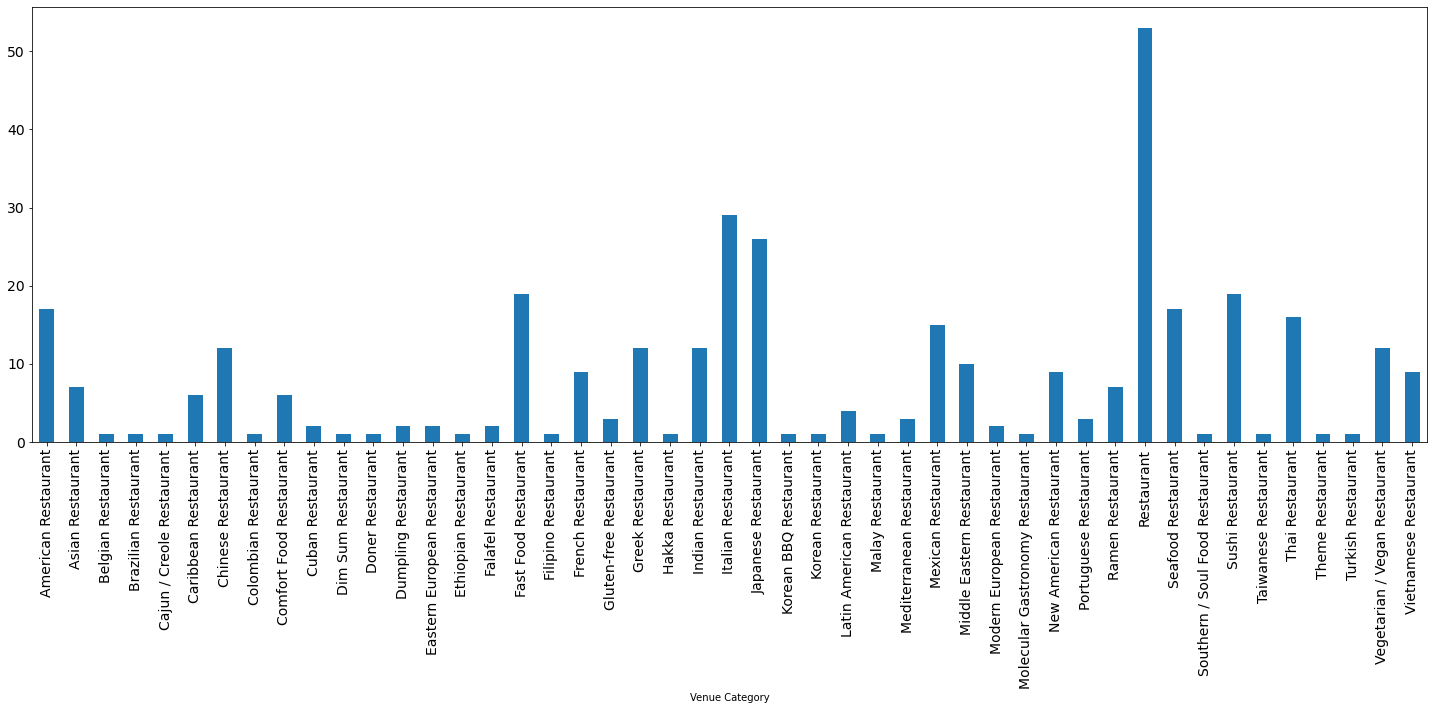

In [21]:
donwntown_venues.groupby('Venue Category').size().plot.bar(figsize=(25,8), fontsize = 14)

## Let's plot our founding into a map

In [22]:
# create map of Toronto using latitude and longitude values
map_toronto = folium.Map(location=[latitude, longitude], zoom_start=10)

# add markers to map
for lat, lng, name in zip(donwntown_venues['Venue Latitude'], donwntown_venues['Venue Longitude'], donwntown_venues['Venue']):
    label = '{}'.format(name)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='red',
        fill=True,
        fill_color='#3186c0',
        fill_opacity=0.7,
        parse_html=False).add_to(map_toronto)  
    
map_toronto

### Analyze each Neighborhood

In [23]:
# one hot encoding of venue categories columns:https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.get_dummies.html
downtown_onehot = pd.get_dummies(donwntown_venues[['Venue Category']], prefix= "", prefix_sep= " ")

# # add neighborhood column back to dataframe
downtown_onehot['Neighbourhood'] = donwntown_venues['Neighbourhood'] 
# move neighborhood column to the first column
fixed_columns = [downtown_onehot.columns[-1]] + list(downtown_onehot.columns[:-1])
downtown_onehot = downtown_onehot[fixed_columns]
print(downtown_onehot.shape)
downtown_onehot.head()

(362, 48)


,Neighbourhood,American Restaurant,Asian Restaurant,Belgian Restaurant,Brazilian Restaurant,Cajun / Creole Restaurant,Caribbean Restaurant,Chinese Restaurant,Colombian Restaurant,Comfort Food Restaurant,Cuban Restaurant,Dim Sum Restaurant,Doner Restaurant,Dumpling Restaurant,Eastern European Restaurant,Ethiopian Restaurant,Falafel Restaurant,Fast Food Restaurant,Filipino Restaurant,French Restaurant,Gluten-free Restaurant,Greek Restaurant,Hakka Restaurant,Indian Restaurant,Italian Restaurant,Japanese Restaurant,Korean BBQ Restaurant,Korean Restaurant,Latin American Restaurant,Malay Restaurant,Mediterranean Restaurant,Mexican Restaurant,Middle Eastern Restaurant,Modern European Restaurant,Molecular Gastronomy Restaurant,New American Restaurant,Portuguese Restaurant,Ramen Restaurant,Restaurant,Seafood Restaurant,Southern / Soul Food Restaurant,Sushi Restaurant,Taiwanese Restaurant,Thai Restaurant,Theme Restaurant,Turkish Restaurant,Vegetarian / Vegan Restaurant,Vietnamese Restaurant
0,"Malvern, Rouge",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,"Guildwood, Morningside, West Hill",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
2,"Guildwood, Morningside, West Hill",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,Woburn,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,Woburn,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


### Now, let's group the rows by neighborhood and calculate the mean of the frequency of each category

In [24]:
downtown_grouped = downtown_onehot.groupby('Neighbourhood').mean().reset_index()
print(downtown_grouped.shape)
downtown_grouped.head()

(61, 48)


,Neighbourhood,American Restaurant,Asian Restaurant,Belgian Restaurant,Brazilian Restaurant,Cajun / Creole Restaurant,Caribbean Restaurant,Chinese Restaurant,Colombian Restaurant,Comfort Food Restaurant,Cuban Restaurant,Dim Sum Restaurant,Doner Restaurant,Dumpling Restaurant,Eastern European Restaurant,Ethiopian Restaurant,Falafel Restaurant,Fast Food Restaurant,Filipino Restaurant,French Restaurant,Gluten-free Restaurant,Greek Restaurant,Hakka Restaurant,Indian Restaurant,Italian Restaurant,Japanese Restaurant,Korean BBQ Restaurant,Korean Restaurant,Latin American Restaurant,Malay Restaurant,Mediterranean Restaurant,Mexican Restaurant,Middle Eastern Restaurant,Modern European Restaurant,Molecular Gastronomy Restaurant,New American Restaurant,Portuguese Restaurant,Ramen Restaurant,Restaurant,Seafood Restaurant,Southern / Soul Food Restaurant,Sushi Restaurant,Taiwanese Restaurant,Thai Restaurant,Theme Restaurant,Turkish Restaurant,Vegetarian / Vegan Restaurant,Vietnamese Restaurant
0,Agincourt,0.000000,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0,1.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0
1,"Bathurst Manor, Wilson Heights, Downsview North",0.000000,0.0,0.0,0.0,0.0,0.0,0.25,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.25,0.0,0.0,0.0,0.0,0.0,0.250000,0.000000,0.0,0.250000,0.0,0.000000,0.0,0.0,0.000000,0.0
2,Bayview Village,0.000000,0.0,0.0,0.0,0.0,0.0,0.50,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.500000,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0
3,"Bedford Park, Lawrence Manor East",0.111111,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.111111,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.111111,0.0,0.111111,0.222222,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.111111,0.000000,0.0,0.111111,0.0,0.111111,0.0,0.0,0.000000,0.0
4,Berczy Park,0.000000,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.083333,0.0,0.0,0.0,0.0,0.083333,0.0,0.0,0.0,0.0,0.083333,0.0,0.083333,0.0,0.000000,0.083333,0.083333,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.166667,0.166667,0.0,0.000000,0.0,0.083333,0.0,0.0,0.083333,0.0


### Let's find out the top 5 venue in each neighborhood

In [25]:
num_top_venues = 5

for hood in downtown_grouped['Neighbourhood']:
    print("----"+hood+"----")
    temp = downtown_grouped[downtown_grouped['Neighbourhood'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    
    #first rows is not usefull it has only Neighbourhood and Neighbourhood-name, so drop this row
    temp = temp.iloc[1:]
    temp['freq'] = round(temp['freq'].astype(float),2)# converting into float type and # taking round values
    temp = temp.sort_values('freq', ascending=False).reset_index(drop=True) # sorting the dataframe by 'freq' in decreasing order
    print(temp.head(num_top_venues))
    print('\n')

----Agincourt----
                        venue  freq
0   Latin American Restaurant   1.0
1         American Restaurant   0.0
2       Portuguese Restaurant   0.0
3           Korean Restaurant   0.0
4            Malay Restaurant   0.0


----Bathurst Manor, Wilson Heights, Downsview North----
                        venue  freq
0          Chinese Restaurant  0.25
1            Sushi Restaurant  0.25
2   Middle Eastern Restaurant  0.25
3                  Restaurant  0.25
4         American Restaurant  0.00


----Bayview Village----
                    venue  freq
0      Chinese Restaurant   0.5
1     Japanese Restaurant   0.5
2     American Restaurant   0.0
3   Portuguese Restaurant   0.0
4       Korean Restaurant   0.0


----Bedford Park, Lawrence Manor East----
                      venue  freq
0        Italian Restaurant  0.22
1   Comfort Food Restaurant  0.11
2           Thai Restaurant  0.11
3          Sushi Restaurant  0.11
4                Restaurant  0.11


----Berczy Park----
    

### Let's put our result into a database

#### But first let's usea function to sort all the restaurant cousine in descending order

In [26]:
def return_most_common_venues(row, num_top_venues):
    row = row.iloc[1:]
    row_sorted = row.sort_values(ascending=False)
    
    return row_sorted.index.values[0:num_top_venues]

In [27]:
num_top_venues = 5

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighbourhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
venues_sorted = pd.DataFrame(columns=columns)
venues_sorted['Neighbourhood'] = downtown_grouped['Neighbourhood']

for ind in np.arange(downtown_grouped.shape[0]):
    venues_sorted.iloc[ind, 1:] = return_most_common_venues(downtown_grouped.iloc[ind, :], num_top_venues)

venues_sorted.head(10)

,Neighbourhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
0,Agincourt,Latin American Restaurant,Vietnamese Restaurant,Indian Restaurant,Greek Restaurant,Gluten-free Restaurant
1,"Bathurst Manor, Wilson Heights, Downsview North",Sushi Restaurant,Chinese Restaurant,Restaurant,Middle Eastern Restaurant,Vietnamese Restaurant
2,Bayview Village,Japanese Restaurant,Chinese Restaurant,Vietnamese Restaurant,Dumpling Restaurant,Greek Restaurant
3,"Bedford Park, Lawrence Manor East",Italian Restaurant,Sushi Restaurant,Comfort Food Restaurant,Greek Restaurant,Indian Restaurant
4,Berczy Park,Seafood Restaurant,Restaurant,Italian Restaurant,French Restaurant,Vegetarian / Vegan Restaurant
5,"Brockton, Parkdale Village, Exhibition Place",Italian Restaurant,Restaurant,Doner Restaurant,Greek Restaurant,Gluten-free Restaurant
6,"Business reply mail Processing Centre, South C...",Fast Food Restaurant,Restaurant,Vietnamese Restaurant,Doner Restaurant,Greek Restaurant
7,Canada Post Gateway Processing Centre,American Restaurant,Mediterranean Restaurant,Middle Eastern Restaurant,Hakka Restaurant,Gluten-free Restaurant
8,Cedarbrae,Hakka Restaurant,Thai Restaurant,Caribbean Restaurant,Doner Restaurant,Greek Restaurant
9,Central Bay Street,Italian Restaurant,Ramen Restaurant,Falafel Restaurant,Indian Restaurant,Vegetarian / Vegan Restaurant


### Using Cluster method in neighborhood

In [28]:
distortions = []
toronto_grouped_clustering = downtown_grouped.drop('Neighbourhood', 1)

K = range(1,50)
for k in K:
    kmean = KMeans(n_clusters=k, random_state=0, n_init = 50, max_iter = 500)
    kmean.fit(toronto_grouped_clustering)
    distortions.append(kmean.inertia_)


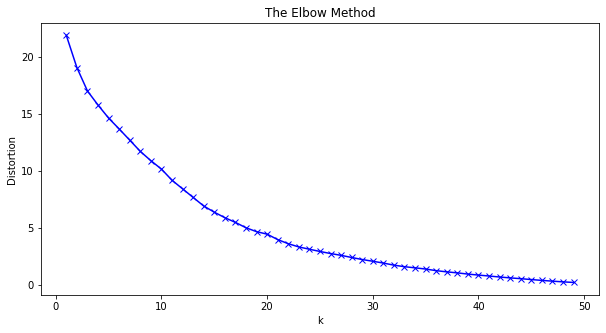

In [29]:
plt.figure(figsize=(10,5))
plt.plot(K, distortions, 'bx-')
plt.title('The Elbow Method')
plt.xlabel('k')
plt.ylabel('Distortion')

plt.show()

## We used the elbow method in order to identify the right number of clusters that we need

In [30]:
# let's cluster our neighborhood into 10 cluisters
k = 20



# run k-means clustering
kmeans = KMeans(n_clusters=k, random_state=0).fit(toronto_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:20]

array([13, 11,  3,  0,  0,  7,  6,  5, 17,  0,  7,  8, 17,  9,  0,  0, 16,
        0, 15,  4], dtype=int32)

In [31]:
# add clustering labels
venues_sorted['Cluster_Labels']=  kmeans.labels_

downtown_toronto_merged = df
# merge top venues_sorted with toronto_data
downtown_toronto_merged = downtown_toronto_merged.join(venues_sorted.set_index('Neighbourhood'), on='Neighborhood')

downtown_toronto_merged.head()

,PostalCode,Borough,Neighborhood,Latitude,Longitude,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,Cluster_Labels
0,M1B,Scarborough,"Malvern, Rouge",43.806686,-79.194353,Fast Food Restaurant,Vietnamese Restaurant,Doner Restaurant,Greek Restaurant,Gluten-free Restaurant,1.0
1,M1C,Scarborough,"Rouge Hill, Port Union, Highland Creek",43.784535,-79.160497,NaN,NaN,NaN,NaN,NaN,NaN
2,M1E,Scarborough,"Guildwood, Morningside, West Hill",43.763573,-79.188711,Mexican Restaurant,Restaurant,Vietnamese Restaurant,Doner Restaurant,Gluten-free Restaurant,11.0
3,M1G,Scarborough,Woburn,43.770992,-79.216917,Korean BBQ Restaurant,Mexican Restaurant,Vietnamese Restaurant,Hakka Restaurant,Gluten-free Restaurant,14.0
4,M1H,Scarborough,Cedarbrae,43.773136,-79.239476,Hakka Restaurant,Thai Restaurant,Caribbean Restaurant,Doner Restaurant,Greek Restaurant,17.0


In [32]:
downtown_toronto_merged.groupby('Cluster_Labels').count()['Neighborhood']

Cluster_Labels
0.0     19
1.0      3
2.0      1
3.0      2
4.0      2
5.0      1
6.0      5
7.0      2
8.0      4
9.0      1
10.0     1
11.0     8
12.0     1
13.0     1
14.0     1
15.0     3
16.0     1
17.0     4
18.0     1
19.0     1
Name: Neighborhood, dtype: int64

In [33]:
# drop any NA value
downtown_toronto_merged.dropna(how='any', inplace= True)

In [34]:
# transform the column in integer
downtown_toronto_merged['Cluster_Labels'] =downtown_toronto_merged['Cluster_Labels'].astype(int)

In [35]:
 downtown_toronto_merged.head(10)

,PostalCode,Borough,Neighborhood,Latitude,Longitude,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,Cluster_Labels
0,M1B,Scarborough,"Malvern, Rouge",43.806686,-79.194353,Fast Food Restaurant,Vietnamese Restaurant,Doner Restaurant,Greek Restaurant,Gluten-free Restaurant,1
2,M1E,Scarborough,"Guildwood, Morningside, West Hill",43.763573,-79.188711,Mexican Restaurant,Restaurant,Vietnamese Restaurant,Doner Restaurant,Gluten-free Restaurant,11
3,M1G,Scarborough,Woburn,43.770992,-79.216917,Korean BBQ Restaurant,Mexican Restaurant,Vietnamese Restaurant,Hakka Restaurant,Gluten-free Restaurant,14
4,M1H,Scarborough,Cedarbrae,43.773136,-79.239476,Hakka Restaurant,Thai Restaurant,Caribbean Restaurant,Doner Restaurant,Greek Restaurant,17
8,M1M,Scarborough,"Cliffside, Cliffcrest, Scarborough Village West",43.716316,-79.239476,American Restaurant,Doner Restaurant,Greek Restaurant,Gluten-free Restaurant,French Restaurant,9
10,M1P,Scarborough,"Dorset Park, Wexford Heights, Scarborough Town...",43.757410,-79.273304,Indian Restaurant,Vietnamese Restaurant,Chinese Restaurant,Dumpling Restaurant,Greek Restaurant,15
11,M1R,Scarborough,"Wexford, Maryvale",43.750072,-79.295849,Middle Eastern Restaurant,Vietnamese Restaurant,Indian Restaurant,Greek Restaurant,Gluten-free Restaurant,4
12,M1S,Scarborough,Agincourt,43.794200,-79.262029,Latin American Restaurant,Vietnamese Restaurant,Indian Restaurant,Greek Restaurant,Gluten-free Restaurant,13
13,M1T,Scarborough,"Clarks Corners, Tam O'Shanter, Sullivan",43.781638,-79.304302,Italian Restaurant,Thai Restaurant,Fast Food Restaurant,Chinese Restaurant,Doner Restaurant,17
15,M1W,Scarborough,"Steeles West, L'Amoreaux West",43.799525,-79.318389,Fast Food Restaurant,Chinese Restaurant,Indian Restaurant,Vietnamese Restaurant,Dumpling Restaurant,6


In [36]:


# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(k)
ys = [i + x + (i*x)**2 for i in range(k)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(downtown_toronto_merged['Latitude'], downtown_toronto_merged['Longitude'], downtown_toronto_merged['Neighborhood'], downtown_toronto_merged['Cluster_Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

## Analyzed Clusters
#### Now, we can examine each cluster and determine the discriminating venue categories that distinguish each cluster. Based on the defining categories.

In [37]:
downtown_grouped.insert(0, 'Cluster_Labels', kmeans.labels_)
print(downtown_grouped.shape)
downtown_grouped.head()

(61, 49)


,Cluster_Labels,Neighbourhood,American Restaurant,Asian Restaurant,Belgian Restaurant,Brazilian Restaurant,Cajun / Creole Restaurant,Caribbean Restaurant,Chinese Restaurant,Colombian Restaurant,Comfort Food Restaurant,Cuban Restaurant,Dim Sum Restaurant,Doner Restaurant,Dumpling Restaurant,Eastern European Restaurant,Ethiopian Restaurant,Falafel Restaurant,Fast Food Restaurant,Filipino Restaurant,French Restaurant,Gluten-free Restaurant,Greek Restaurant,Hakka Restaurant,Indian Restaurant,Italian Restaurant,Japanese Restaurant,Korean BBQ Restaurant,Korean Restaurant,Latin American Restaurant,Malay Restaurant,Mediterranean Restaurant,Mexican Restaurant,Middle Eastern Restaurant,Modern European Restaurant,Molecular Gastronomy Restaurant,New American Restaurant,Portuguese Restaurant,Ramen Restaurant,Restaurant,Seafood Restaurant,Southern / Soul Food Restaurant,Sushi Restaurant,Taiwanese Restaurant,Thai Restaurant,Theme Restaurant,Turkish Restaurant,Vegetarian / Vegan Restaurant,Vietnamese Restaurant
0,13,Agincourt,0.000000,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0,1.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0
1,11,"Bathurst Manor, Wilson Heights, Downsview North",0.000000,0.0,0.0,0.0,0.0,0.0,0.25,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.25,0.0,0.0,0.0,0.0,0.0,0.250000,0.000000,0.0,0.250000,0.0,0.000000,0.0,0.0,0.000000,0.0
2,3,Bayview Village,0.000000,0.0,0.0,0.0,0.0,0.0,0.50,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.500000,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0
3,0,"Bedford Park, Lawrence Manor East",0.111111,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.111111,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.111111,0.0,0.111111,0.222222,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.111111,0.000000,0.0,0.111111,0.0,0.111111,0.0,0.0,0.000000,0.0
4,0,Berczy Park,0.000000,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.083333,0.0,0.0,0.0,0.0,0.083333,0.0,0.0,0.0,0.0,0.083333,0.0,0.083333,0.0,0.000000,0.083333,0.083333,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.166667,0.166667,0.0,0.000000,0.0,0.083333,0.0,0.0,0.083333,0.0


### Now, lte's plot our finding into a heatmap

In [38]:
toronto_clusters = downtown_grouped.groupby('Cluster_Labels').mean()
toronto_clusters_tr = toronto_clusters.transpose()
toronto_clusters_tr.head(30)

Cluster_Labels,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
American Restaurant,0.054898,0.0,0.0,0.00,0.0,0.333333,0.075,0.0,0.062500,1.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0
Asian Restaurant,0.025603,0.0,0.0,0.00,0.0,0.000000,0.025,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0
Belgian Restaurant,0.000000,0.0,0.0,0.00,0.0,0.000000,0.000,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.014706,0.0,0.0
Brazilian Restaurant,0.003472,0.0,0.0,0.00,0.0,0.000000,0.000,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0
Cajun / Creole Restaurant,0.000000,0.0,0.0,0.00,0.0,0.000000,0.000,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.035714,0.0,0.0
Caribbean Restaurant,0.015046,0.0,1.0,0.00,0.0,0.000000,0.000,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.098039,0.0,0.0
Chinese Restaurant,0.030093,0.0,0.0,0.25,0.0,0.000000,0.100,0.0,0.000000,0.0,0.0,0.052083,0.0,0.0,0.0,0.083333,0.0,0.062500,1.0,0.0
Colombian Restaurant,0.003472,0.0,0.0,0.00,0.0,0.000000,0.000,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0
Comfort Food Restaurant,0.022797,0.0,0.0,0.00,0.0,0.000000,0.000,0.0,0.035714,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.014706,0.0,0.0
Cuban Restaurant,0.017361,0.0,0.0,0.00,0.0,0.000000,0.000,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0


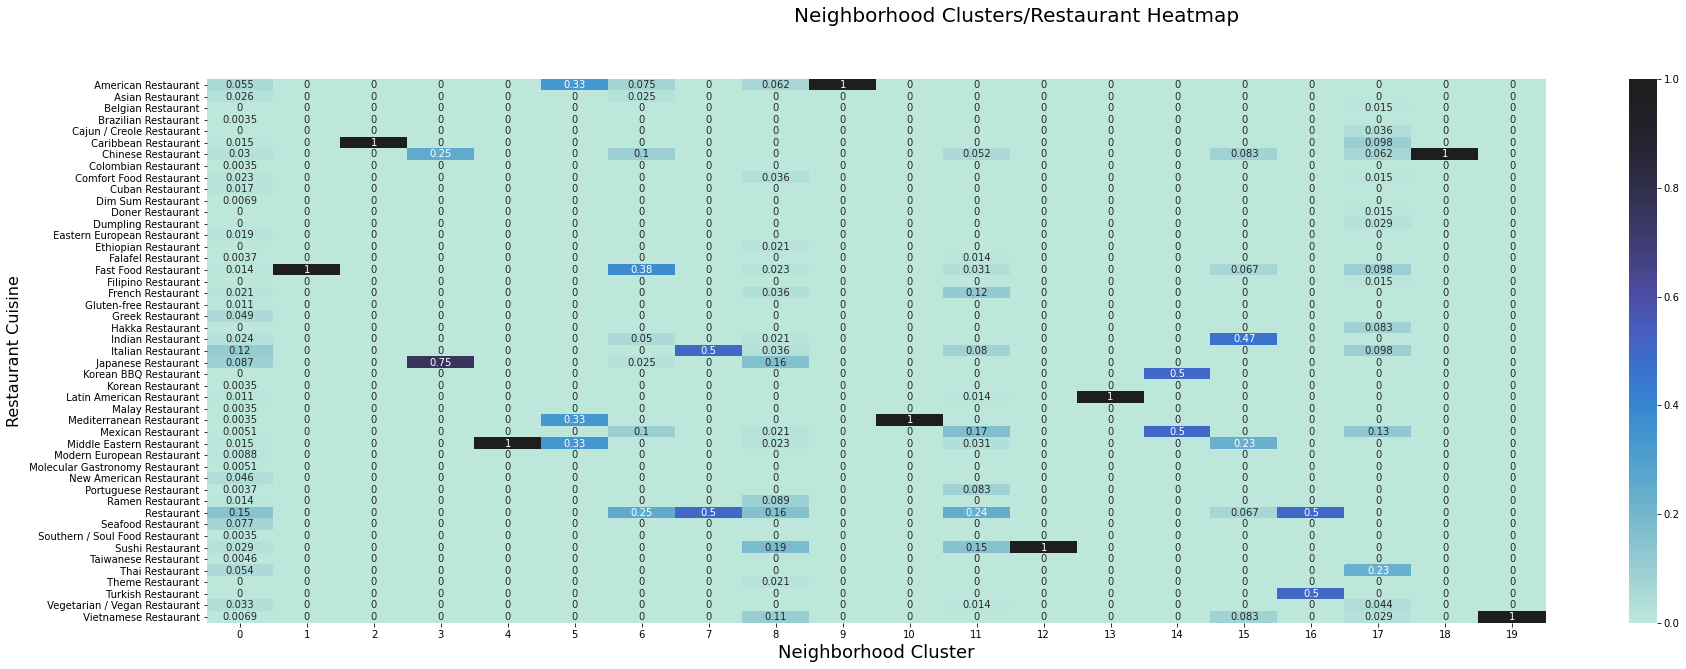

In [39]:
fig, ax = plt.subplots(figsize=(30,10))  
# plot heatmap

ax = sns.heatmap(toronto_clusters_tr, center=1, annot=True, ax=ax)

fig.suptitle('Neighborhood Clusters/Restaurant Heatmap', fontsize=20)
plt.xlabel('Neighborhood Cluster', fontsize=18)
plt.ylabel('Restaurant Cuisine', fontsize=16)
# save figure
plt.show()

## Dark color means that the restaurant cuisine is very common in the corresponding neighborhood cluster, for example if someone is willing to open a new Chinese Restaurant, we can recommend him where not to open his new restaurant.

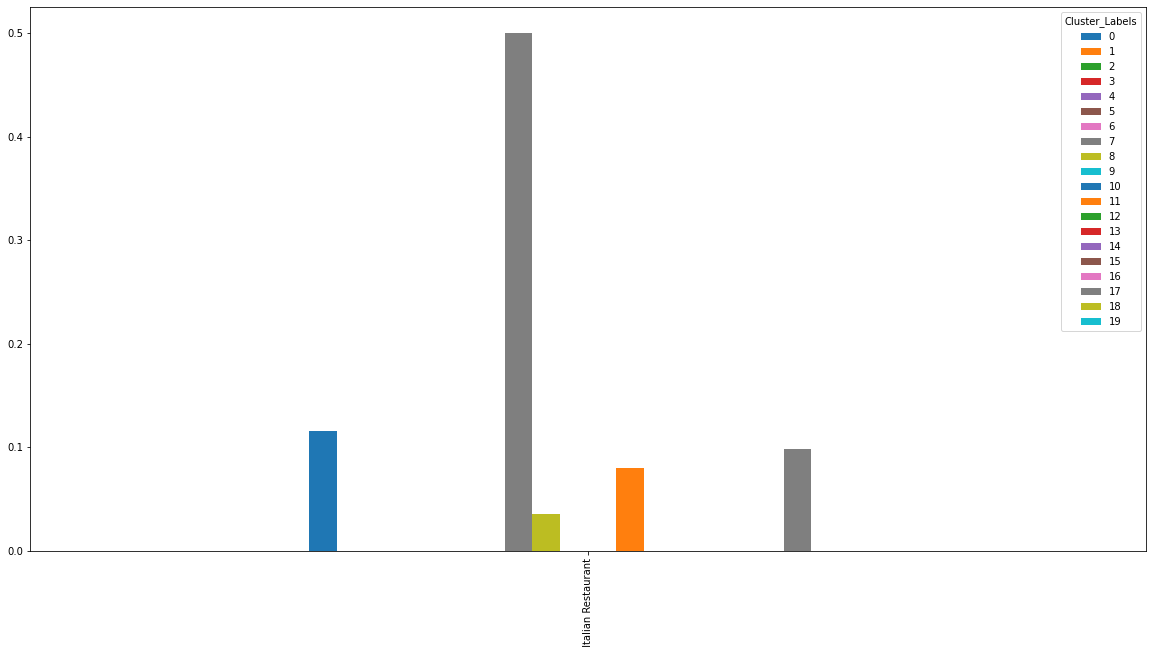

In [40]:
toronto_clusters_tr[23:24].plot (kind='bar', figsize= (20,10))
plt.title=("Concentration of Italian Restaurant")
plt.show()

## As we can see, Cluster 7 has the highest frequency of Italian Restaurants, follow by Cluster 0, 8, 1 and 7 is not appear any Italian Restaurant

In [41]:
# Cluster 1
to= downtown_toronto_merged.loc[downtown_toronto_merged['Cluster_Labels'] == 0, downtown_toronto_merged.columns[[1] + list(range(5, downtown_toronto_merged.shape[1]))]]
to.head(50)

,Borough,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,Cluster_Labels
26,North York,Japanese Restaurant,Italian Restaurant,Caribbean Restaurant,Restaurant,Chinese Restaurant,0
27,North York,Japanese Restaurant,Italian Restaurant,Caribbean Restaurant,Restaurant,Chinese Restaurant,0
41,East Toronto,Greek Restaurant,Italian Restaurant,Restaurant,Sushi Restaurant,Caribbean Restaurant,0
43,East Toronto,American Restaurant,Seafood Restaurant,Comfort Food Restaurant,Latin American Restaurant,Middle Eastern Restaurant,0
47,Central Toronto,Italian Restaurant,Sushi Restaurant,Indian Restaurant,Thai Restaurant,Seafood Restaurant,0
51,Downtown Toronto,Restaurant,Italian Restaurant,Chinese Restaurant,Indian Restaurant,Thai Restaurant,0
54,Downtown Toronto,Fast Food Restaurant,Ramen Restaurant,Italian Restaurant,Mexican Restaurant,Thai Restaurant,0
55,Downtown Toronto,Seafood Restaurant,Japanese Restaurant,Restaurant,Italian Restaurant,Vegetarian / Vegan Restaurant,0
56,Downtown Toronto,Seafood Restaurant,Restaurant,Italian Restaurant,French Restaurant,Vegetarian / Vegan Restaurant,0
57,Downtown Toronto,Italian Restaurant,Ramen Restaurant,Falafel Restaurant,Indian Restaurant,Vegetarian / Vegan Restaurant,0


In [42]:
# Cluster 2
downtown_toronto_merged.loc[downtown_toronto_merged['Cluster_Labels'] == 1, downtown_toronto_merged.columns[[1] + list(range(5, downtown_toronto_merged.shape[1]))]]

,Borough,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,Cluster_Labels
0,Scarborough,Fast Food Restaurant,Vietnamese Restaurant,Doner Restaurant,Greek Restaurant,Gluten-free Restaurant,1
92,Etobicoke,Fast Food Restaurant,Vietnamese Restaurant,Doner Restaurant,Greek Restaurant,Gluten-free Restaurant,1
101,Etobicoke,Fast Food Restaurant,Vietnamese Restaurant,Doner Restaurant,Greek Restaurant,Gluten-free Restaurant,1


In [43]:
# Cluster 16
downtown_toronto_merged.loc[downtown_toronto_merged['Cluster_Labels'] == 17, downtown_toronto_merged.columns[[1] + list(range(5, downtown_toronto_merged.shape[1]))]]

,Borough,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,Cluster_Labels
4,Scarborough,Hakka Restaurant,Thai Restaurant,Caribbean Restaurant,Doner Restaurant,Greek Restaurant,17
13,Scarborough,Italian Restaurant,Thai Restaurant,Fast Food Restaurant,Chinese Restaurant,Doner Restaurant,17
67,Downtown Toronto,Mexican Restaurant,Vegetarian / Vegan Restaurant,Vietnamese Restaurant,Dumpling Restaurant,Belgian Restaurant,17
82,West Toronto,Thai Restaurant,Mexican Restaurant,Italian Restaurant,Cajun / Creole Restaurant,Fast Food Restaurant,17


In [44]:
# Cluster 10
downtown_toronto_merged.loc[downtown_toronto_merged['Cluster_Labels'] == 11, downtown_toronto_merged.columns[[1] + list(range(5, downtown_toronto_merged.shape[1]))]]

,Borough,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,Cluster_Labels
2,Scarborough,Mexican Restaurant,Restaurant,Vietnamese Restaurant,Doner Restaurant,Gluten-free Restaurant,11
28,North York,Sushi Restaurant,Chinese Restaurant,Restaurant,Middle Eastern Restaurant,Vietnamese Restaurant,11
34,North York,French Restaurant,Portuguese Restaurant,Vietnamese Restaurant,Doner Restaurant,Greek Restaurant,11
38,East York,Sushi Restaurant,Restaurant,Mexican Restaurant,Vietnamese Restaurant,Doner Restaurant,11
42,East Toronto,Italian Restaurant,Fast Food Restaurant,Sushi Restaurant,Restaurant,Dim Sum Restaurant,11
53,Downtown Toronto,French Restaurant,Mexican Restaurant,Restaurant,Vietnamese Restaurant,Doner Restaurant,11
84,West Toronto,Italian Restaurant,Sushi Restaurant,Vegetarian / Vegan Restaurant,French Restaurant,Latin American Restaurant,11
85,Downtown Toronto,Italian Restaurant,Sushi Restaurant,Chinese Restaurant,Restaurant,Portuguese Restaurant,11


In [45]:
# Cluster 7
downtown_toronto_merged.loc[downtown_toronto_merged['Cluster_Labels'] == 8, downtown_toronto_merged.columns[[1] + list(range(5, downtown_toronto_merged.shape[1]))]]

,Borough,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,Cluster_Labels
22,North York,Ramen Restaurant,Japanese Restaurant,Sushi Restaurant,Vietnamese Restaurant,Middle Eastern Restaurant,8
49,Central Toronto,Vietnamese Restaurant,Sushi Restaurant,Restaurant,American Restaurant,Thai Restaurant,8
52,Downtown Toronto,Sushi Restaurant,Japanese Restaurant,Restaurant,Vietnamese Restaurant,Mexican Restaurant,8
66,Downtown Toronto,Japanese Restaurant,Italian Restaurant,French Restaurant,Sushi Restaurant,Restaurant,8


In [46]:
# Cluster 6
downtown_toronto_merged.loc[downtown_toronto_merged['Cluster_Labels'] == 7, downtown_toronto_merged.columns[[1] + list(range(5, downtown_toronto_merged.shape[1]))]]

,Borough,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,Cluster_Labels
75,Downtown Toronto,Italian Restaurant,Restaurant,Doner Restaurant,Greek Restaurant,Gluten-free Restaurant,7
78,West Toronto,Italian Restaurant,Restaurant,Doner Restaurant,Greek Restaurant,Gluten-free Restaurant,7
